## Predictive model
This notebook contains forecasting model using information from fire data and smoke estimates. This model is designed to project smoke estimates for the next 25 years, covering the period from 2025 to 2050.

In [8]:

pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Program Files\Python310\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\stlp\\AppData\\Local\\Temp\\pip-install-ssdz6kxs\\sklearn_27d20bc3203d4daa94d652b9a7693afc\\setup.py'"'"'; __file__='"'"'C:\\Users\\stlp\\AppData\\Local\\Temp\\pip-install-ssdz6kxs\\sklearn_27d20bc3203d4daa94d652b9a7693afc\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\stlp\AppData\Local\Temp\pip-pip-egg-info-2xk1mgm8'
         cwd: C:\Users\stlp\AppData\Local\Temp\pip-install-ssdz6kxs\sklearn_27d20bc3203d4daa94d652b9a7693afc\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip 

In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [27]:
# Load the smoke estimates
smoke_estimate = pd.read_csv('Csv-files/smoke_estimate_per_year.csv')
smoke_estimate.head()

,year,smoke_estimate
0,1964,77.618454
1,1965,89.425083
2,1966,91.594205
3,1967,131.062469
4,1968,157.871613


## Linear Regression
In this section, I am applying the linear regression model to forecast the smoke estimate.

In [28]:
# generate an ML model to forecast the smoke estimate for the next 25 years
# Prepare data for modeling
X = smoke_estimate[['year']]
y = smoke_estimate['smoke_estimate']

# Split the data into training and testing sets
train_size = int(len(smoke_estimate) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [29]:
# --- Linear Regression Model ---
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate model performance for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print(f'Linear Regression Performance:')
print(f'Mean Absolute Error: {mae_linear:.2f}')
print(f'Mean Squared Error: {mse_linear:.2f}')
print(f'Root Mean Squared Error: {rmse_linear:.2f}\n')



Linear Regression Performance:
Mean Absolute Error: 15.41
Mean Squared Error: 316.76
Root Mean Squared Error: 17.80



## Random Forest model
In this section, I am using Random forest model to make the prediction.


In [30]:
# --- Random Forest Model ---
# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate model performance for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Random Forest Performance:')
print(f'Mean Absolute Error: {mae_rf:.2f}')
print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'Root Mean Squared Error: {rmse_rf:.2f}\n')



Random Forest Performance:
Mean Absolute Error: 8.67
Mean Squared Error: 100.90
Root Mean Squared Error: 10.04



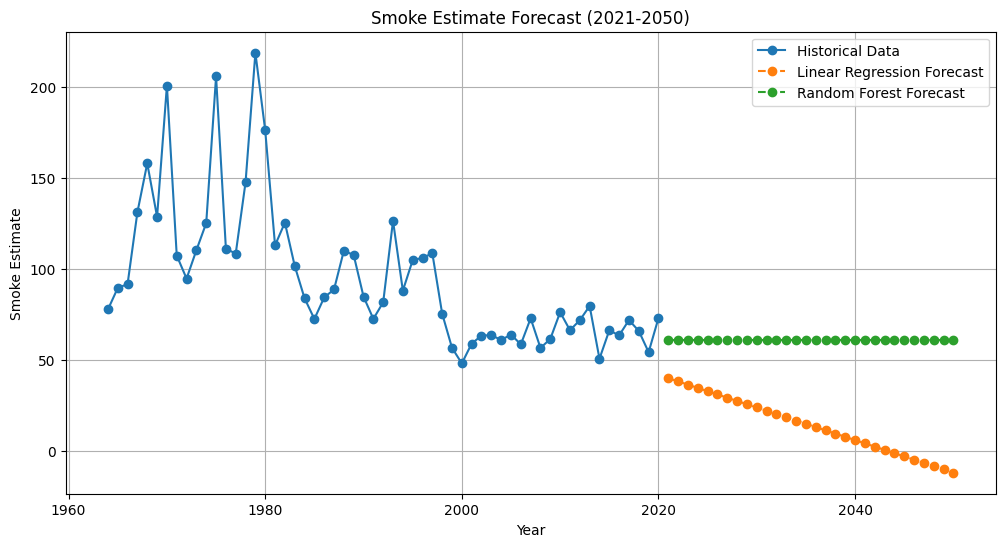

    year  smoke_estimate_linear  smoke_estimate_rf
0   2021              39.915767          60.797883
1   2022              38.124783          60.797883
2   2023              36.333798          60.797883
3   2024              34.542814          60.797883
4   2025              32.751829          60.797883
5   2026              30.960845          60.797883
6   2027              29.169861          60.797883
7   2028              27.378876          60.797883
8   2029              25.587892          60.797883
9   2030              23.796907          60.797883
10  2031              22.005923          60.797883
11  2032              20.214938          60.797883
12  2033              18.423954          60.797883
13  2034              16.632970          60.797883
14  2035              14.841985          60.797883
15  2036              13.051001          60.797883
16  2037              11.260016          60.797883
17  2038               9.469032          60.797883
18  2039               7.678047

In [31]:
# Prepare future years for predictions (2021 to 2050)
future_years = pd.DataFrame({'year': np.arange(2021, 2051)})

# Make future predictions using both models
future_years['smoke_estimate_linear'] = linear_model.predict(future_years[['year']])
future_years['smoke_estimate_rf'] = random_forest_model.predict(future_years[['year']])
# Combine historical and future data for visualization
combined = pd.concat([smoke_estimate, future_years[['year', 'smoke_estimate_linear', 'smoke_estimate_rf']]], ignore_index=True)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(smoke_estimate['year'], smoke_estimate['smoke_estimate'], label='Historical Data', marker='o')
plt.plot(future_years['year'], future_years['smoke_estimate_linear'], label='Linear Regression Forecast', linestyle='--', marker='o')
plt.plot(future_years['year'], future_years['smoke_estimate_rf'], label='Random Forest Forecast', linestyle='--', marker='o')
plt.title('Smoke Estimate Forecast (2021-2050)')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.legend()
plt.grid()
plt.show()

# Display future predictions
print(future_years[['year', 'smoke_estimate_linear', 'smoke_estimate_rf']])

## ARIMA Model
In this section, I am using the ARIMA model to forecast the smoke estimate.

In [32]:
# Set the year as the index
smoke_estimate.set_index('year', inplace=True)

# Check for stationarity
result = adfuller(smoke_estimate['smoke_estimate'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is not stationary; difference the data
if result[1] > 0.05:
    smoke_estimate['smoke_estimate_diff'] = smoke_estimate['smoke_estimate'].diff().dropna()
    print("Differencing applied.")
else:
    smoke_estimate['smoke_estimate_diff'] = smoke_estimate['smoke_estimate']



ADF Statistic: -0.8923141652753558
p-value: 0.7904929348502345
Differencing applied.


In [33]:
# Fit the ARIMA model (order p, d, q)
model = ARIMA(smoke_estimate['smoke_estimate'], order=(1, 1, 1))
model_fit = model.fit()

# Forecasting the next 30 years
forecast = model_fit.forecast(steps=30)

# Prepare future years
future_years = pd.DataFrame({'year': np.arange(2021, 2051)})
future_years.set_index('year', inplace=True)

# Add forecasted values to the DataFrame
future_years['smoke_estimate_arima'] = forecast.values



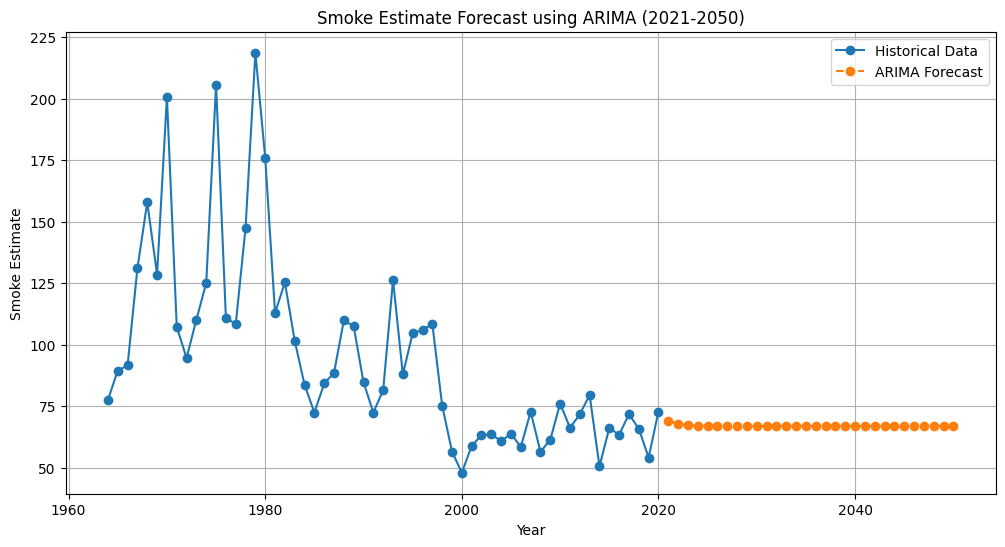

In [34]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(smoke_estimate.index, smoke_estimate['smoke_estimate'], label='Historical Data', marker='o')
plt.plot(future_years.index, future_years['smoke_estimate_arima'], label='ARIMA Forecast', linestyle='--', marker='o')
plt.title('Smoke Estimate Forecast using ARIMA (2021-2050)')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.legend()
plt.grid()
plt.show()



In [35]:
# Performance Evaluation
# Split the original data into train and test sets
train_size = int(len(smoke_estimate) * 0.8)
train, test = smoke_estimate.iloc[:train_size], smoke_estimate.iloc[train_size:]

# Fit the model on the training set
model_eval = ARIMA(train['smoke_estimate'], order=(1, 1, 1))
model_fit_eval = model_eval.fit()

# Make predictions on the test set
predictions = model_fit_eval.forecast(steps=len(test))

# Calculate performance metrics
mae = mean_absolute_error(test['smoke_estimate'], predictions)
mse = mean_squared_error(test['smoke_estimate'], predictions)
rmse = np.sqrt(mse)

print(f'Performance Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}\n')

# Display future predictions
print(future_years[['smoke_estimate_arima']])

Performance Metrics:
Mean Absolute Error (MAE): 6.35
Mean Squared Error (MSE): 68.83
Root Mean Squared Error (RMSE): 8.30

      smoke_estimate_arima
year                      
2021             69.196263
2022             67.815638
2023             67.295677
2024             67.099853
2025             67.026103
2026             66.998328
2027             66.987867
2028             66.983928
2029             66.982444
2030             66.981885
2031             66.981675
2032             66.981596
2033             66.981566
2034             66.981554
2035             66.981550
2036             66.981549
2037             66.981548
2038             66.981548
2039             66.981548
2040             66.981548
2041             66.981548
2042             66.981548
2043             66.981548
2044             66.981548
2045             66.981548
2046             66.981548
2047             66.981548
2048             66.981548
2049             66.981548
2050             66.981548


In [36]:
future_years_output_path = "future_smoke_estimate_predictions.csv"
future_years[['smoke_estimate_arima']].to_csv(future_years_output_path)

print(f"Future predictions saved successfully to {future_years_output_path}")

Future predictions saved successfully to future_smoke_estimate_predictions.csv


In [40]:
predicted_smoke_estimate = pd.read_csv("future_smoke_estimate_predictions.csv")
predicted_smoke_estimate.head()

,year,smoke_estimate_arima
0,2021,69.196263
1,2022,67.815638
2,2023,67.295677
3,2024,67.099853
4,2025,67.026103


## Results
**Linear regression**  
Linear Regression Performance:  
Mean Absolute Error: 15.41  
Mean Squared Error: 316.76  
Root Mean Squared Error: 17.80  
**Random forest**  
Random Forest Performance:  
Mean Absolute Error: 8.67  
Mean Squared Error: 100.90  
Root Mean Squared Error: 10.04  

**Arima model**  
Performance Metrics:  
Mean Absolute Error (MAE): 6.35  
Mean Squared Error (MSE): 68.83  
Root Mean Squared Error (RMSE): 8.30  

From the results we see that the ARIMA model performs better than linear regression and slightly better than random forest.
Linear regression is a bad model to use for time series data. Although Arima model performs better, the data quality also affects the performance. Here we have just 2 columns and 60 rows. For forecasting time series, we do not have any other feature information.
